## Generating code
In this notebook we will produce some image processing Python code and execute it to see if it works. We will build up the query gradually to demonstrate that short concise high quality code depends on the details we present in the prompt.

In [1]:
import openai

def prompt(message:str, model="gpt-3.5-turbo"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    response = openai.ChatCompletion.create(
        model=model,
        messages=[{"role": "user", "content": message}]
    )
    return response['choices'][0]['message']['content']

In [2]:
query1 = """
Write python code to open the image file '../../data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.
"""

code = prompt(query1)
print(code)

import numpy as np
import cv2

# Open the image file
img = cv2.imread('../../data/blobs.tif', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's method to threshold the image
_, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply connected component labeling to the thresholded image
num_labels, labels = cv2.connectedComponents(th)

# Create a colormap for the labels
colormap = np.zeros((num_labels, 3))
for i in range(1, num_labels):
    colormap[i] = np.random.randint(0, 255, size=3)

# Visualize the label image
label_image = colormap[labels]
cv2.imshow('Label Image', label_image)
cv2.waitKey(0)


In [3]:
query2 = query1 + """
Do not explain the solution. 
Only write Python code and short comments are ok.
"""
code = prompt(query2)
print(code)

```python
import numpy as np
import cv2
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('../../data/blobs.tif', 0)

# Threshold using Otsu's method
thresh = threshold_otsu(img)
binary = img > thresh

# Label connected components
label_img = label(binary)

# Visualize label image
plt.imshow(label_img, cmap='jet')
plt.show()
```


In [4]:
query3 = query2 + """
Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* Matplotlib
* PIL
* Pillow
"""
code = prompt(query3)
print(code)

# Import necessary libraries
import numpy as np
import skimage.io as io
from skimage.filters import threshold_otsu
from scipy.ndimage import label

# Load image 
img = io.imread('../../data/blobs.tif')

# Thresholding using Otsu's method
thresh_value = threshold_otsu(img)
binary_img = img > thresh_value

# Connected component labeling
label_img, num_labels = label(binary_img)

# Visualization
from IPython.display import display
display(label_img)


In [5]:
query4 = query3 + """
Keep the code short and concise.
"""

code = prompt(query4)
print(code)

```python
import numpy as np
from skimage import io, filters, morphology

# Read the image
img = io.imread('../../data/blobs.tif')

# Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(img)
binary_image = img > threshold_value

# Apply connected component labeling
label_image = morphology.label(binary_image)

# Visualize label image
io.imshow(label_image)
io.show()
```


For completeness, we just print out the entiry query once again.

In [6]:
print(query4)


Write python code to open the image file '../../data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.

Do not explain the solution. 
Only write Python code and short comments are ok.

Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* Matplotlib
* PIL
* Pillow

Keep the code short and concise. 
Return the code as code only without markdown.



Next, we execute the code.

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


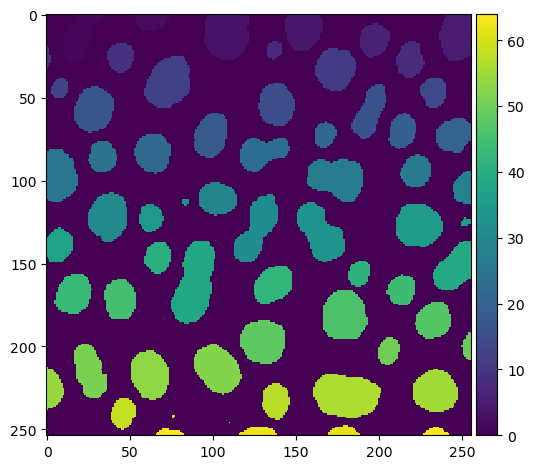

In [8]:
clean_code = code.replace('```python','').replace('```','')

exec(clean_code)